# PROJECT BY: RITIK SURI

## The Sparks Foundation- Data Science & Business Analytics Intern

### TASK: Prediction using Supervised ML

- Problem statement is to predict the percentage of a student based on the number of study hours and we have to calculate the predicted score if a student studies for 9.25 hours/day


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the Dataset

In [2]:
url="http://bit.ly/w-data"
df= pd.read_csv('http://bit.ly/w-data')


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Understanding the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.shape

(25, 2)

## Visualization of Data

- <b> Scatterplot

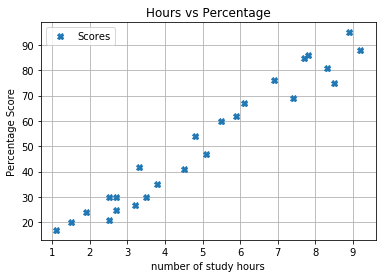

In [7]:
df.plot(x='Hours', y='Scores', style='X') 
plt.title('Hours vs Percentage')  
plt.xlabel('number of study hours')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

- <b>Histogram

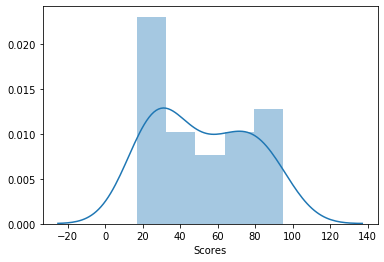

In [8]:
sns.distplot(df['Scores'],bins=5)

### Splitting the data

In [9]:
X= df.iloc[:, :-1].values
y= df.iloc[:,1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18, 1)
(18,)
(7, 1)
(7,)


### Applying Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plotting the best Fitting Line

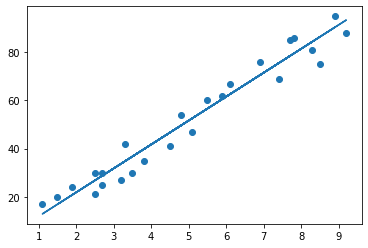

In [14]:
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predicting the Test Set

In [15]:
y_pred = model.predict(X_test)

In [16]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Predicting the Score when a student studies for 9.25 hours/day 

In [17]:
hours=9.25
pred_new=model.predict([[hours]])
print("No of Study hours are {}".format(hours))
print("Predicted Score is {}".format(pred_new[0]))

No of Study hours are 9.25
Predicted Score is 93.89272889341655


### Evaluting the Model

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.130879918502486
